# Siamese Network on oldsmiledata dataset

In [1]:
!nvidia-smi

Sat Nov 20 09:57:56 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.91.03    Driver Version: 460.91.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  GeForce GTX 1080    Off  | 00000000:01:00.0  On |                  N/A |
|  0%   42C    P8    19W / 240W |    588MiB /  8116MiB |      2%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
#%%capture
#!wget -c https://repo.continuum.io/miniconda/Miniconda3-latest-Linux-x86_64.sh
#!chmod +x Miniconda3-latest-Linux-x86_64.sh
#!time bash ./Miniconda3-latest-Linux-x86_64.sh -b -f -p /usr/local
#!time conda install -q -y -c conda-forge rdkit

In [3]:
# Import
import pandas as pd
import numpy as np
from pathlib import Path

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import sys
import os
sys.path.append('/usr/local/lib/python3.7/site-packages/')
from rdkit import Chem
from rdkit.Chem import AllChem

RDKit WARNING: [09:57:57] Enabling RDKit 2019.09.3 jupyter extensions


In [5]:
dataset = 'oldsmiledata_id_processed_transformed_shuffled'

In [6]:
path = Path('../dataset/oldsmiledata')

In [40]:
list(path.iterdir())

[Path('../dataset/oldsmiledata/test_oldsmiledata_id_processed_transformed_shuffled.csv'),
 Path('../dataset/oldsmiledata/oldsmiledata_id_processed_transformed_rescaled_shuffled.csv'),
 Path('../dataset/oldsmiledata/.ipynb_checkpoints'),
 Path('../dataset/oldsmiledata/mol_images'),
 Path('../dataset/oldsmiledata/train_oldsmiledata_id_processed_transformed_shuffled.csv')]

In [41]:
#IMAGES = path/'mol_images'/'all'
train = pd.read_csv(path/f'train_{dataset}.csv')
valid = pd.read_csv(path/f'test_{dataset}.csv')

In [42]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23924 entries, 0 to 23923
Data columns (total 41 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   template                        23924 non-null  object 
 1   docked                          23924 non-null  object 
 2   rmsd                            23924 non-null  float64
 3   uniprot_id                      23924 non-null  object 
 4   smiles_template                 23924 non-null  object 
 5   smiles_docked                   23924 non-null  object 
 6   mcs_smartsString                23924 non-null  object 
 7   template_HeavyAtomCount         23924 non-null  int64  
 8   template_NHOHCount              23924 non-null  int64  
 9   template_NOCount                23924 non-null  int64  
 10  template_RingCount              23924 non-null  int64  
 11  template_NumHAcceptors          23924 non-null  int64  
 12  template_NumHDonors             

In [43]:
valid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1024 entries, 0 to 1023
Data columns (total 41 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   template                        1024 non-null   object 
 1   docked                          1024 non-null   object 
 2   rmsd                            1024 non-null   float64
 3   uniprot_id                      1024 non-null   object 
 4   smiles_template                 1024 non-null   object 
 5   smiles_docked                   1024 non-null   object 
 6   mcs_smartsString                1024 non-null   object 
 7   template_HeavyAtomCount         1024 non-null   int64  
 8   template_NHOHCount              1024 non-null   int64  
 9   template_NOCount                1024 non-null   int64  
 10  template_RingCount              1024 non-null   int64  
 11  template_NumHAcceptors          1024 non-null   int64  
 12  template_NumHDonors             10

In [44]:
train.head()

,template,docked,rmsd,uniprot_id,smiles_template,smiles_docked,mcs_smartsString,template_HeavyAtomCount,template_NHOHCount,template_NOCount,...,mcs_template_NumHDonors,mcs_docked_NumHDonors,mcs_template_NumRotatableBonds,mcs_docked_NumRotatableBonds,ec_tanimoto_similarity,fc_tanimoto_similarity,log_RMSD,bin_RMSD,Xtransf_ec_tanimoto_similarity,Xtransf_fc_tanimoto_similarity
0,1YPJ_UIB,1K22_MEL,4.643,P00734,CC[C@@H]1[C@@H]2[C@H](C(=O)N1Cc1ccc3c(c1)OCO3)[C@H](c1ccc(C(=N)N)cc1)N(C)C2(C)C,N=C(N)c1ccc(CNC(=O)[C@@H]2CCN2C(=O)[C@H](NCC(=O)O)C2CCCCC2)cc1,"[#7]=[#6](-[#7])-[#6]1:[#6]:[#6]:[#6](:[#6]:[#6]:1)-[#6]-[#7]-[#6]-[#6]-[#6]-[#6]-[#7]-[#6]-[#6]-,:[#6]-,:[#6]-,:[#6]-,:[#6]-,:[#6]",33,3,7,...,2,3,4,7,0.165775,0.289941,1.535361,3,-0.342246,-0.100592
1,2JH5_895,1C5O_BAM,3.209,P00734,C[C@@H](C(=O)N1CCOCC1)N1CC[C@H](NS(=O)(=O)/C=C/c2ccc(Cl)s2)C1=O,NC(=[NH2+])c1ccccc1,"[#7]-[#6]-[#6]:,-[#6]:,-[#6]",28,1,8,...,0,1,0,1,0.050847,0.059829,1.165959,3,-1.491525,-2.401709
2,5Y12_8JX,1TOW_CRZ,1.769,P15090,COc1ccc(S(=O)(=O)NCCCCC(=O)O)c2ccccc12,O=C(O)CCCn1c2ccccc2c2ccccc21,[#6]1:[#6]:[#6]:[#6]:[#6]:[#6]:1:[#6]:[#6]:[#6]:[#6],23,2,6,...,0,0,0,0,0.324561,0.324561,0.570414,1,1.245614,0.245614
3,1C1U_BAI,5AHG_Y4L,3.943,P00734,N=C(N)c1ccc2[nH]c(Cc3nc4ccccc4[nH]3)nc2c1,CN(C)S(=O)(=O)Nc1ccc(Cl)cc1,"[#7]-,:[#6]1:[#6]:[#6]:[#6]:[#6]:[#6]:1",22,5,6,...,1,1,0,1,0.086957,0.106195,1.371942,3,-1.130435,-1.938053
4,2W26_RIV,2Y80_439,7.217,P00742,O=C(NC[C@H]1CN(c2ccc(N3CCOCC3=O)cc2)C(=O)O1)c1ccc(Cl)s1,CN(C)[C@@H]1CCc2cc(N3CC[C@H](NS(=O)(=O)c4ccc5cc(Cl)ccc5c4)C3=O)ccc21,[#7]-[#6]-[#6]-[#6]-[#7](-[#6]1:[#6]:[#6]:[#6]:[#6]:[#6]:1)-[#6]=[#8],29,1,8,...,1,1,3,2,0.187166,0.283237,1.976439,3,-0.128342,-0.167630


# Preprocessing building ImageDataGenerator

In [45]:
import matplotlib.pyplot as plt
import numpy as np
import os
import random
import tensorflow as tf
from pathlib import Path
from tensorflow.keras import applications
from tensorflow.keras import layers
from tensorflow.keras import losses
from tensorflow.keras import optimizers
from tensorflow.keras import metrics
from tensorflow.keras import Model
from tensorflow.keras.applications import resnet50

In [46]:
train['img_temp'] = train['template'] + '.png'
train['img_docked'] = train['docked'] + '.png'
train['is_valid'] = False
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23924 entries, 0 to 23923
Data columns (total 44 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   template                        23924 non-null  object 
 1   docked                          23924 non-null  object 
 2   rmsd                            23924 non-null  float64
 3   uniprot_id                      23924 non-null  object 
 4   smiles_template                 23924 non-null  object 
 5   smiles_docked                   23924 non-null  object 
 6   mcs_smartsString                23924 non-null  object 
 7   template_HeavyAtomCount         23924 non-null  int64  
 8   template_NHOHCount              23924 non-null  int64  
 9   template_NOCount                23924 non-null  int64  
 10  template_RingCount              23924 non-null  int64  
 11  template_NumHAcceptors          23924 non-null  int64  
 12  template_NumHDonors             

In [47]:
valid['img_temp'] = valid['template'] + '.png'
valid['img_docked'] = valid['docked'] + '.png'
valid['is_valid'] = True
valid.head()

,template,docked,rmsd,uniprot_id,smiles_template,smiles_docked,mcs_smartsString,template_HeavyAtomCount,template_NHOHCount,template_NOCount,...,mcs_docked_NumRotatableBonds,ec_tanimoto_similarity,fc_tanimoto_similarity,log_RMSD,bin_RMSD,Xtransf_ec_tanimoto_similarity,Xtransf_fc_tanimoto_similarity,img_temp,img_docked,is_valid
0,2C8Y_C3M,3SHC_B01,6.732,P00734,N[C@@H](Cc1ccccc1)[C@H](O)CNS(=O)(=O)c1ccc2ccccc2c1,N[C@H](Cc1ccccc1)C(=O)N1CCC[C@H]1C(=O)NCc1cc(Cl)ccn1,[#7]-[#6](-[#6]-[#6]1:[#6]:[#6]:[#6]:[#6]:[#6]:1)-[#6],26,4,5,...,3,0.240260,0.308219,1.906872,3,0.402597,0.082192,2C8Y_C3M.png,3SHC_B01.png,True
1,2D1J_D01,1LPZ_CMB,7.109,P00742,O=C(c1cc2c(ccc[n+]2[O-])s1)N1CCN(S(=O)(=O)c2cc3cc(Cl)ccc3[nH]2)CC1,Cc1cccc2c1cc(C(=O)NCc1cc(Cl)cc(Cl)c1)n2Cc1cccc(C(=N)N)c1,"[#6](:[#6]:[#6]:[#6]:,-[#6]:,-[#7](:,-[#6]-[#6]-[#7])-[#6]-[#6]):[#6]:[#6]",31,1,8,...,3,0.147959,0.203209,1.961362,3,-0.520408,-0.967914,2D1J_D01.png,1LPZ_CMB.png,True
2,4A7I_A7I,1NFX_RDR,7.520,P00742,CC(C)N1CCC(NS(=O)(=O)CCNC(=O)c2ccc(Cl)s2)CC1,O=C1CN(S(=O)(=O)c2cc3ccc(Cl)cc3s2)CCN1Cc1cc2cnccc2n1CCO,"[#6]-[#6](-,:[#6])-,:[#7](-,:[#6]-,:[#6]-,:[#6]-,:[#7])-[#6]-[#6]",24,2,6,...,3,0.137143,0.177515,2.017566,3,-0.628571,-1.224852,4A7I_A7I.png,1NFX_RDR.png,True
3,1ZGV_501,1C5O_BAM,3.197,P00734,CCCCNc1cc(C)nc2nc(Nc3cc(Cl)ccc3C)nn12,NC(=[NH2+])c1ccccc1,"[#7]-[#6]-,:[#6](:[#6]:[#6]:[#6]:[#6]):,-[#6]",24,2,6,...,1,0.064815,0.127451,1.162213,3,-1.351852,-1.725490,1ZGV_501.png,1C5O_BAM.png,True
4,3DA6_BZ9,4W4V_3H8,11.188,P53779,CNc1nccc(-c2cccnc2Oc2c(C)cc(Nc3nc4ccccc4[nH]3)c3ccccc23)n1,Cc1cc(NC(=O)c2cccc(-n3cc(NC(=O)Nc4ccccc4Cl)cn3)c2)ccn1,"[#7]:[#6]:[#6](-,:[#7]-,:[#6]-[#7]-[#6]1:[#6]:[#6]:[#6]:[#6]:[#6]:1):[#6]",36,3,8,...,2,0.190698,0.213270,2.414842,3,-0.093023,-0.867299,3DA6_BZ9.png,4W4V_3H8.png,True


In [48]:
target_shape=(224, 224)

In [49]:
IMAGES = '../dataset/oldsmiledata/mol_images/all'

In [50]:
def load_image(filename):
    img_str = tf.io.read_file(filename)
    image = tf.image.decode_jpeg(img_str, channels=3)
    image = tf.image.convert_image_dtype(image, tf.float32)
    image = tf.image.resize(image, target_shape)
    return image

In [51]:
image = load_image(IMAGES + '/4A7I_A7I.png')
image

<tf.Tensor 'resize/Squeeze:0' shape=(224, 224, 3) dtype=float32>

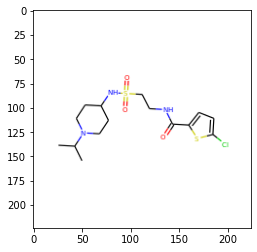

In [52]:
init = tf.initialize_all_variables()
sess = tf.Session()
sess.run(init)
im = sess.run(image)
plt.imshow(im)

# Create Siamese net with keras